## Clustering with IRIS

In [1]:
import pandas as pd
import matplotlib as mpl 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn import datasets

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
%matplotlib inline
mpl.rcParams["figure.figsize"] = (14,10)

# Yellowbrick &mdash; Clustering Evaluation Examples

The Yellowbrick library is a diagnostic visualization platform for machine learning that allows data scientists to steer the model selection process. It extends the scikit-learn API with a new core object: the `Visualizer`. Visualizers allow models to be fit and transformed as part of the scikit-learn pipeline process, providing visual diagnostics throughout the transformation of high-dimensional data.

In machine learning, clustering models are unsupervised methods that attempt to detect patterns in unlabeled data. There are two primary classes of clustering algorithms: *agglomerative* clustering which links similar data points together, and *centroidal* clustering which attempts to find centers or partitions in the data.

Currently, Yellowbrick provides two visualizers to evaluate *centroidal* mechanisms, particularly K-Means clustering, that help users discover an optimal $K$ parameter in the clustering metric:
- `KElbowVisualizer`  visualizes the clusters according to a scoring function, looking for an "elbow" in the curve. 
- `SilhouetteVisualizer`  visualizes the silhouette scores of each cluster in a single model.

In [2]:
# Load iris flower dataset
iris = datasets.load_iris()

X = iris.data               #clustering is unsupervised learning hence we load only Features X and not the target y

### Let's have a look at the dataset

Before we dive into how this data can be evaluated efficiently using Yellowbrick, let's have a look at how the clusters actually look.

In [3]:
# Converting the data into dataframe
feature_names = iris.feature_names
iris_dataframe = pd.DataFrame(X, columns=feature_names)
iris_dataframe.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [ ]:
# import plotly.express as px
# df = px.data.iris()
# fig = px.scatter_3d(iris_dataframe, x ='sepal length (cm)', y='sepal width (cm)', z='petal length (cm)')
#               #color='species')
# fig.show()

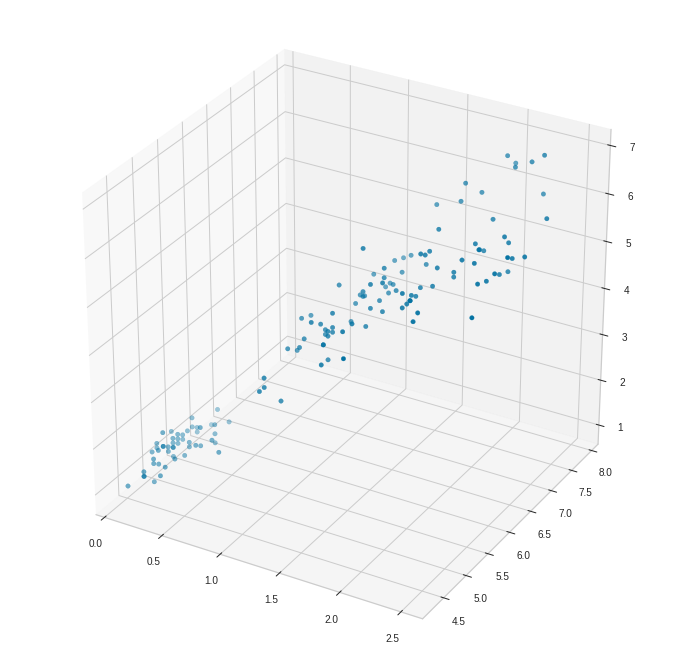

In [4]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:,3], X[:,0], X[:,2])

### K-Means Algorithm
K-Means is a simple unsupervised machine learning algorithm that groups data into the number $K$ of clusters specified by the user, even if it is not the optimal number of clusters for the dataset. 

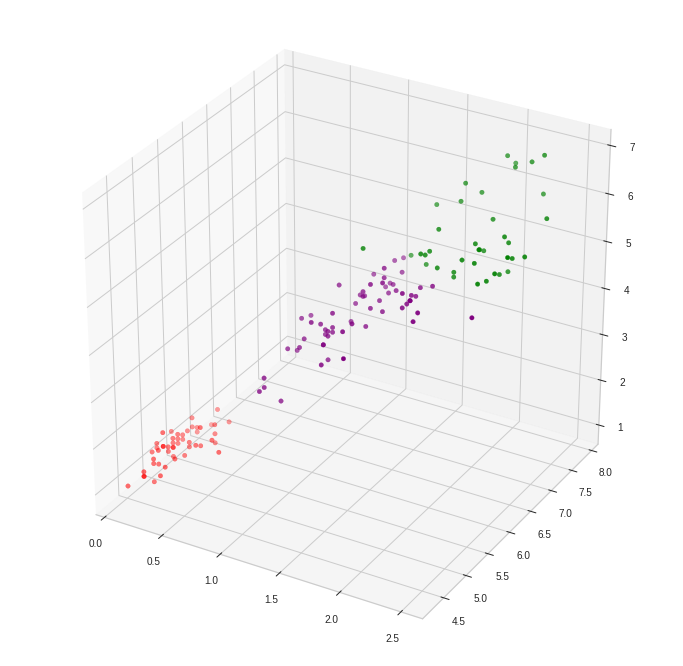

In [5]:
# Fitting the model with a dummy model, with 3 clusters (we already know there are 3 classes in the Iris dataset)
k_means = KMeans(n_clusters=3, random_state=667)
k_means.fit(X)

# Plotting a 3d plot using matplotlib to visualize the data points
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')

# Setting the colors to match cluster results
colors = ['red' if label == 0 else 'purple' if label==1 else 'green' for label in k_means.labels_]

ax.scatter(X[:,3], X[:,0], X[:,2], c=colors)

In the above example plot, one of the clusters is linearly seperable and at a good seperation from other two clusters. Two of the clusters are close by and not linearly seperable.

Also the dataset is 4-dimensional i.e. it has 4 features, but for the sake of visualization using `matplotlib`, one of dimensions has been ignored. Therefore, it can be said that just visualization of data-points is not always enough for knowing optimal number of clusters $K$. 

## Elbow Method 

Yellowbrick's `KElbowVisualizer` implements the “elbow” method of selecting the optimal number of clusters by fitting the K-Means model with a range of values for $K$. If the line chart looks like an arm, then the “elbow” (the point of inflection on the curve) is a good indication that the underlying model fits best at that point.

In the following example, the `KElbowVisualizer` fits the model for a range of $K$ values from 2 to 10, which is set by the parameter `k=(2,11)`. When the model is fit with 3 clusters we can see an "elbow" in the graph, which in this case we know to be the optimal number since our dataset has 3 clusters of points. 

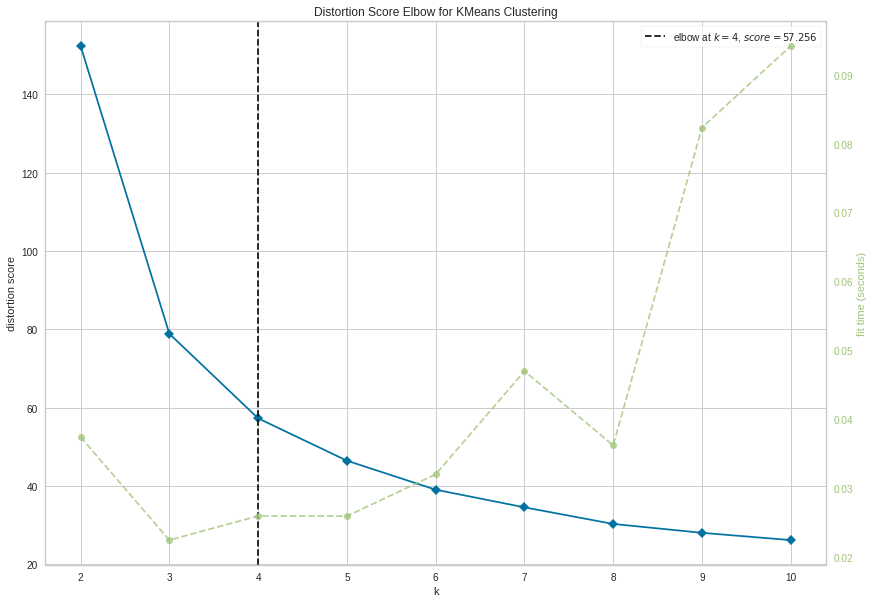

In [ ]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,11))

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.show()    # Draw/show/show the data

By default, the scoring parameter `metric` is set to `distortion`, which computes the sum of squared distances from each point to its assigned center. However, two other metrics can also be used with the `KElbowVisualizer`&mdash;`silhouette` and `calinski_harabaz`. The `silhouette` score is the mean silhouette coefficient for all samples, while the `calinski_harabaz` score computes the ratio of dispersion between and within clusters.
 
The `KElbowVisualizer` also displays the amount of time to fit the model per $K$, which can be hidden by setting `timings=False`. In the following example, we'll use the `calinski_harabaz` score and hide the time to fit the model.

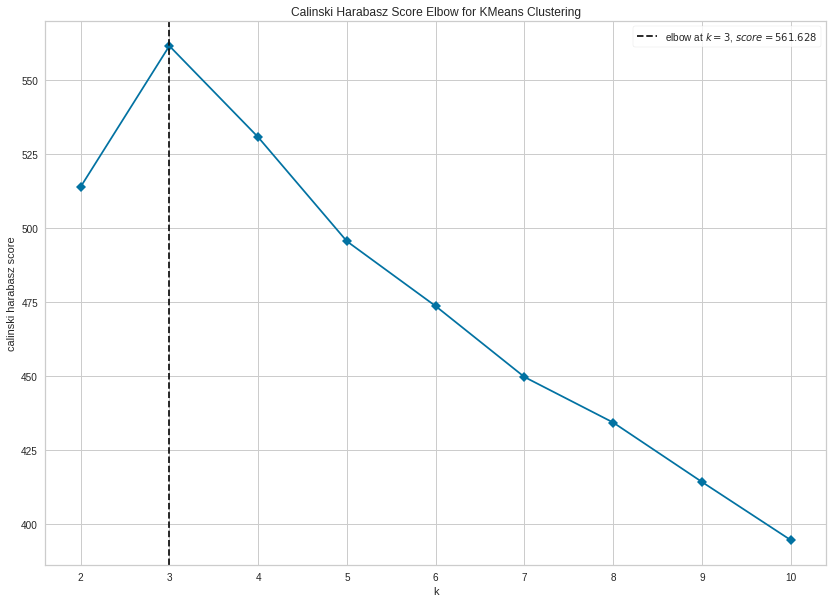

In [ ]:
# Instantiate the clustering model and visualizer 
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,11), metric='calinski_harabasz', timings=False)

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.show() 

It is important to remember that the Elbow method does not work well if the data is not very clustered. In such cases, you might see a smooth curve and the optimal value of $K$ will be unclear.

You can learn more about the Elbow method at Robert Grove's [Blocks](https://bl.ocks.org/rpgove/0060ff3b656618e9136b).

## Coordinate Centroidi

Si ricorda che il primo passo dell’algoritmo è quello di inizializzare i centroidi, o i punti centrali dei vari cluster. Con Sklearn ciò è molto semplice dopo la creazione del modello.

Basta richiamare la funzione cluster_centers_ della classe kmeans.

In [6]:
km = KMeans(n_clusters=3)
km.fit(X)
centers = km.cluster_centers_
centers

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

## Prediction vs Real
Il risultato sarà il seguente (0 indica la classe “Setosa”, 1 indica la classe “Versicolor” e 2 indica la classe “Virginica”):

In [7]:
y_pred = km.labels_
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2], dtype=int32)

In [8]:
import numpy as np
#remap 1-->0, 0-->1
y_pred = np.where(y_pred==0, 3, y_pred) 
y_pred = np.where(y_pred==1, 0, y_pred)
y_pred = np.where(y_pred==3, 1, y_pred)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [9]:
y = iris.target

In [10]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

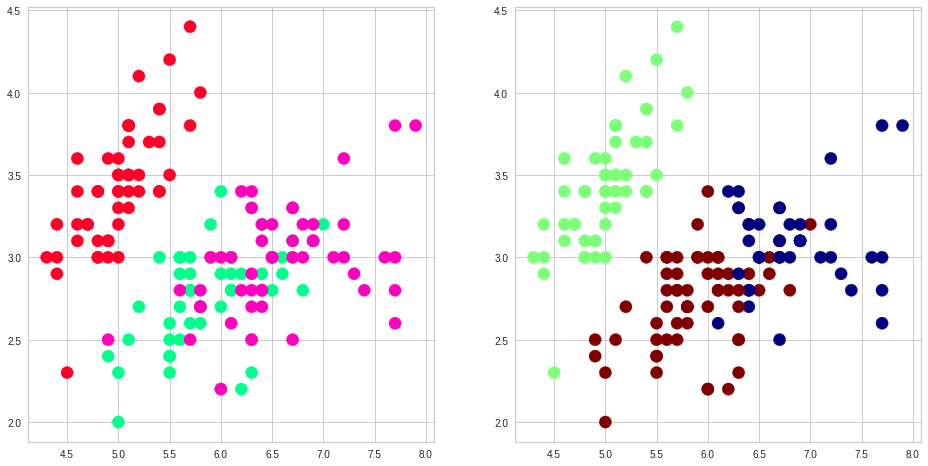

In [11]:
fig, axes = plt.subplots(1,2,figsize=(16,8))
axes[0].scatter(X[:,0],X[:,1],c=y, cmap='gist_rainbow', s=150);
axes[1].scatter(X[:,0],X[:,1],c=y_pred, cmap='jet', s=150);

In [13]:
confronto = pd.DataFrame(list(zip(y,y_pred)), columns=['Reali','Predetti'])
confronto

,Reali,Predetti
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
145,2,0
146,2,2
147,2,0
148,2,0


In [ ]:
# length = y_pred.shape[0] # 30 
# x = np.linspace(0,length,length)


# plt.figure(figsize=(20,15))
# plt.plot(x, y, label='test')
# plt.plot(x, y_pred, label='predetto')
# plt.legend(loc=2);

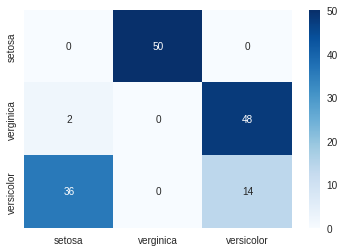

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y, y_pred)
labels = ['setosa','verginica','versicolor']
sns.heatmap(cm,xticklabels=labels,yticklabels=labels,annot=True,fmt=".0f",cmap='Blues');

## Silhouette Visualizer 

Silhouette analysis can be used to evaluate the density and separation between clusters. The score is calculated by averaging the silhouette coefficient for each sample, which is computed as the difference between the average intra-cluster distance and the mean nearest-cluster distance for each sample, normalized by the maximum value. This produces a score between -1 and +1, where scores near +1 indicate high separation and scores near -1 indicate that the samples may have been assigned to the wrong cluster.

The `SilhouetteVisualizer` displays the silhouette coefficient for each sample on a per-cluster basis, allowing users to visualize the density and separation of the clusters. This is particularly useful for determining cluster imbalance or for selecting a value for $K$ by comparing multiple visualizers.

Since we created the sample dataset for these examples, we already know that the data points are grouped into 8 clusters. So for the first `SilhouetteVisualizer` example, we'll set $K$ to 3 in order to show how the plot looks when using the optimal value of $K$. 

Notice that graph contains homogeneous and long silhouettes. In addition, the vertical red-dotted line on the plot indicates the average silhouette score for all observations.

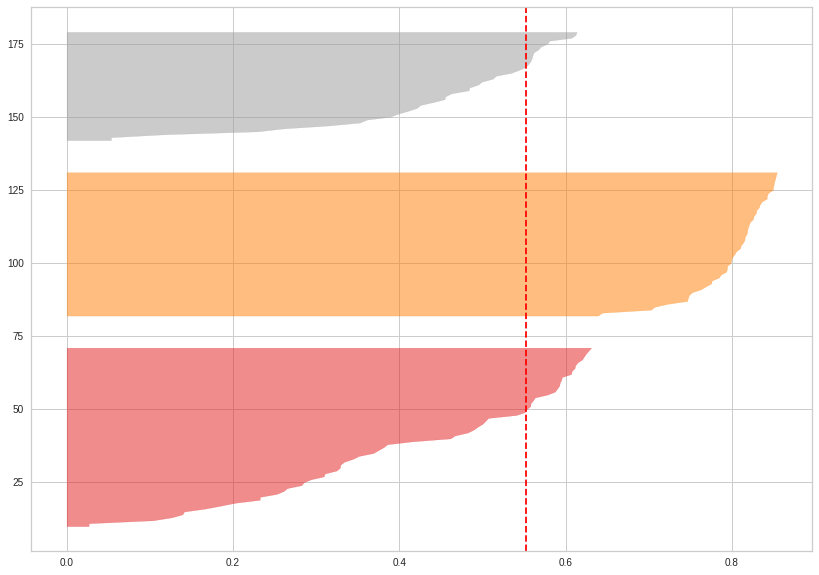

In [ ]:
# Instantiate the clustering model and visualizer 
model = KMeans(3)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(X)    # Fit the data to the visualizer
visualizer;   # Draw/show/show the data

For the next example, let's see what happens when using a non-optimal value for $K$, in this case, 6. 

Now we see that the width of clusters 1 to 6 have become narrow, of unequal width and their silhouette coefficient scores have dropped. This occurs because the width of each silhouette is proportional to the number of samples assigned to the cluster. The model is trying to fit our data into a larger than optimal number of clusters, making some of the clusters narrower but much less cohesive as seen from the drop in average-silhouette score.

SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f03631e1650>,
                     estimator=KMeans(n_clusters=6))

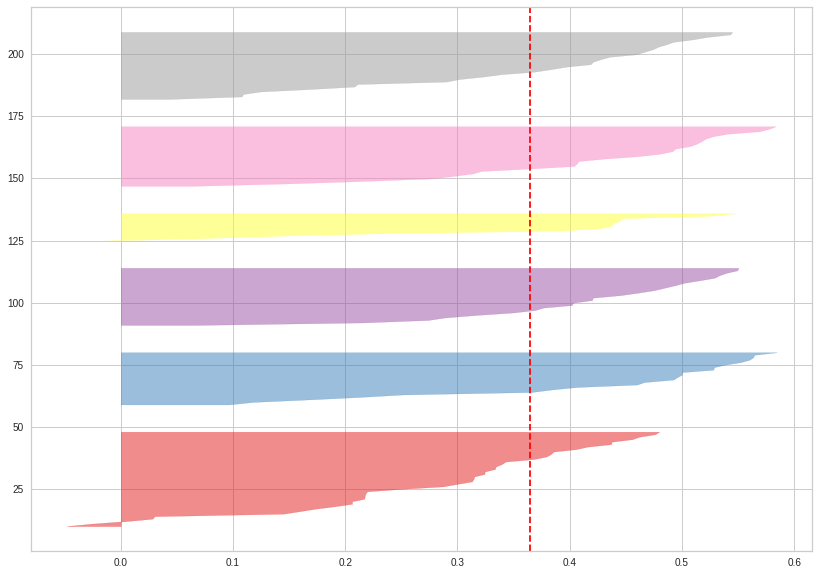

In [ ]:
# Instantiate the clustering model and visualizer 
model = KMeans(6)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(X)    # Fit the data to the visualizer
visualizer   # Draw/show/show the data

## Dendogram

The dendrogram illustrates how each cluster is composed by drawing a U-shaped link between a non-singleton cluster and its children. The top of the U-link indicates a cluster merge. The two legs of the U-link indicate which clusters were merged. The length of the two legs of the U-link represents the distance between the child clusters. It is also the cophenetic distance between original observations in the two children clusters.

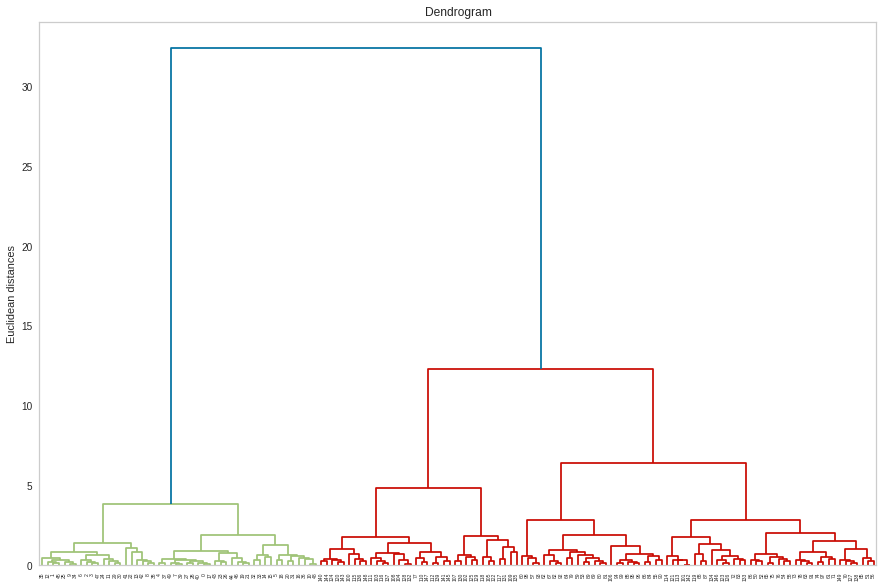

In [16]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(15,10))
plt.title('Dendrogram')
plt.ylabel('Euclidean distances')
plt.grid(False)
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.show()